# Atmospheric Attenuation

In [39]:
import numpy as np
import matplotlib.pyplot as plt

As the noise is propogated through the air, the noise is reduced

In [40]:
def absorption(f=1000, t=10, rh=80, ps=1.01325e5):
    """ 
    Calculate the attenuation coefficient for a given frequency, temperature, relative humidity, and atmospheric pressure.
    
    Input:
    f: frequency in Hz
    t: temperature in °C
    rh: relative humidity in %
    ps: atmospheric pressure in Pa
    
    Output:
    alpha: attenuation coefficient
    """
    
    # Convert atmospheric pressure to a variable that won't be modified
    ps0 = 1.01325e5
    
    # Convert temperature from Celsius to Kelvin
    T = t + 273.15
    # Reference temperature in Kelvin
    T0 = 293.15
    
    # Reference temperature in Kelvin for saturation vapor pressure
    T01 = 273.16
    
    # Calculate saturation vapor pressure constant
    Csat = -6.8346 * (T01/T)**1.261 + 4.6151
    
    # Calculate saturation vapor pressure
    rhosat = 10**Csat
    
    # Calculate relative humidity ratio
    H = rhosat * rh * ps0 / ps
    
    # Calculate frequency-dependent term for attenuation due to water vapor
    frn = (ps / ps0) * (T0/T)**0.5 * (9 + 280 * H * np.exp(-4.17 * ((T0/T)**(1/3) - 1)))
    
    # Calculate frequency-dependent term for attenuation due to oxygen
    fro = (ps / ps0) * (24.0 + 4.04e4 * H * (0.02 + H) / (0.391 + H))
    
    # Calculate the attenuation coefficient
    alpha = 20/np.log(10) * f**2 * (1.84e-11 / ( (T0/T)**0.5 * ps / ps0 )+ (T/T0)**(-2.5)* (0.10680 * np.exp(-3352 / T) * frn / (f**2 + frn * frn)+ 0.01278 * np.exp(-2239.1 / T) * fro / (f**2 + fro * fro)))
    
    return alpha


Lets visualize the atmospheric absorption for different relative humidities and frequencies.

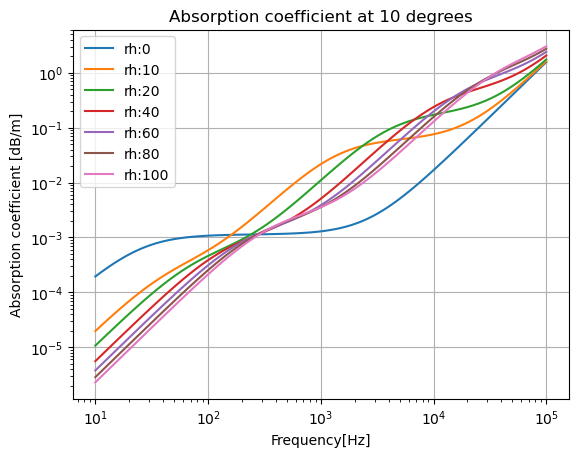

In [41]:
t = 10 # temperature
fs = np.logspace(1, 5, num=100, endpoint=True, base=10) # frequency range
alphas = np.zeros(fs.shape) # initiate alpha
rhs = (0, 10, 20, 40, 60, 80, 100) # relative humidity range

plt.figure()
for rh in rhs:
    for i, f in enumerate(fs):
        alphas[i] = absorption(f, t, rh)
    plt.loglog(fs, alphas, label='rh:%d'%rh)
plt.title(f'Absorption coefficient at {t} degrees')
plt.grid(True)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Absorption coefficient [dB/m]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The noise power level thus decreases linearly with distance and can be calculated as $A_{atm} = \alpha \cdot d$.

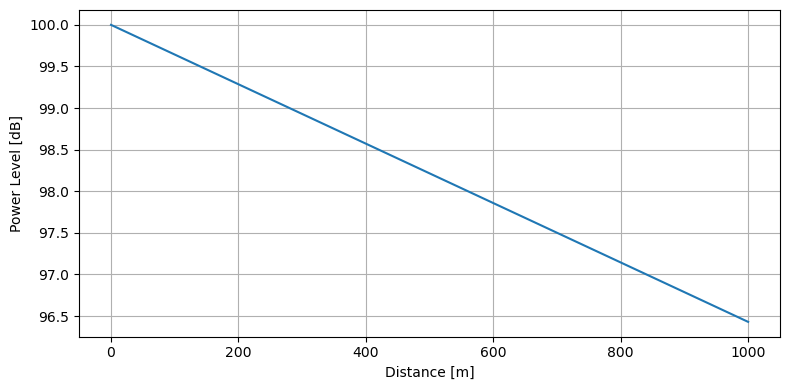

In [49]:
d = np.linspace(0, 1000)
A0 = 100

A = A0 - absorption() * d

plt.figure(figsize=(8,4))
plt.plot(d, A)
plt.xlabel("Distance [m]")
plt.ylabel("Power Level [dB]")
plt.grid()
plt.tight_layout()
plt.show()

From the plot it can be seen the the effect is minimal.